# PW 1 - Markovian models  
Sampling of Markovian models.

The aim of this session is to program the Gibbs sampler algorithm and study it in the binary case.

In this section we consider a binary Markov random field (taking values in $E=\{0,1\}$).
The neighborhood is defined in 4-connexity and the potential of a clique of order 2 is defined by :
$U_c(0,1)=U_c(1,0)=+\beta$ and $U_c(1,1)=U_c(0,0)=0$ (the potential for singleton clique is 0).


In [3]:
import math
import random
import numpy as np
import platform
import tempfile
import os
import matplotlib.pyplot as plt
import imageio
from scipy import ndimage as ndi

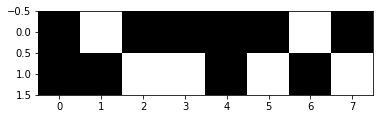

In [8]:
plt.set_cmap('gray')

sh=[2,8]

imaU=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaU)

#Q1
For the Ising model defined above, and the imaU generated in the previous cell, give the formula of the global energy and give its value as a function of $\beta$ for imaU.



For ImaU, $U(x) = 15 \beta $ because we have : 
- 4 transitions for the first line
- 5 transitions for the second line
- 6 transitions for the columns

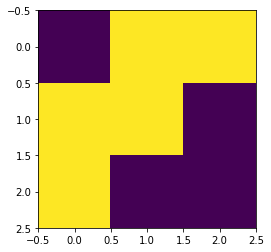

In [6]:
sh=[3,3]

imaVois=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(imaVois)

#Q2

Write the general form of the local conditional probability in a pixel $s$. For the neighborhood configuration imaVois generated by the previous code cell, compute the 2 local conditional energies (for the value 0 and for the value 1 of the central pixel), then the local conditional probabilities (as a function of $\beta$). What is the most probable class ? (NB: do the calculation for an 8-neighborhood).


I ran the code after i calculate the most probable class and it gave me a new image so the calculus below is not good for this image but it works for the previous one.

We consider the problem in the 8 connexity case :

The general formula is : $P(X_s = x_s \mid V_s) = \frac{\exp(-U_s(x_s, V_s))}{Z_s}$

- $P(0 \mid V_s) = \frac{\exp(-5 \beta)}{Z_s}$
- $P(1 \mid V_s) = \frac{\exp(-3 \beta)}{Z_s}$

with $Z_s = \exp(-5 \beta) + \exp(-3 \beta) $

The most probable class is 1.

## Part 1

Programming the Gibbs sampler and drawing samples of Markovian models



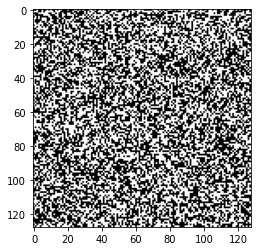

In [7]:
plt.set_cmap('gray')

sh=[128,128]

im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

### Sampling function
Complete the following function which takes as input a binary image (which will be updated by Gibbs sampling) and the value of the regularization parameter.


In [9]:
def echan(im_bin,beta_reg):

    i=0
    j=0

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):
          # do not change these indices
          # they allow access to neighboring pixels
          # i1,j and i2,j and i,j1 and i,j2
            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

            L = [im_bin[i1][j],im_bin[i2][j],im_bin[i][j1],im_bin[i][j2]]
            #print(L)

            b = L.count(1.0)
            #print(b)
            no = L.count(0.0)
            #print(no)

            # complete the calculation of energies and associated probabilities
            # energy and non-normalized proba when the pixel is put in class 0
            Ureg0= no*beta_reg
            p0=math.exp(-Ureg0)

            # energy and non-normalized proba when the pixel is put in class 1
            Ureg1= b*beta_reg
            p1=math.exp(-Ureg1)

            # sampling according to the normalized probabilities. NB: the normalization is done here
            if (p0+p1!=0.):
                if(random.uniform(0,1)<p0/(p0+p1)):
                    im_bin[i,j]= 0 
                else :
                    im_bin[i,j]= 1

    return im_bin

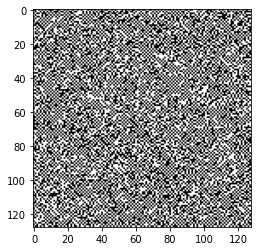

In [10]:
im_bin_echan = echan(im_bin, 100)
plt.imshow(im_bin_echan)
plt.show()


By varying the value of the regularization parameter and restarting the cell, observe. You can remove the visualization during sampling and increase the number of iterations

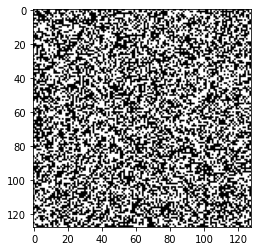

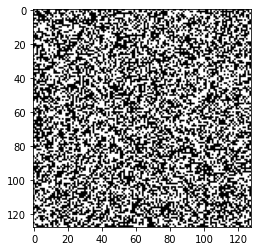

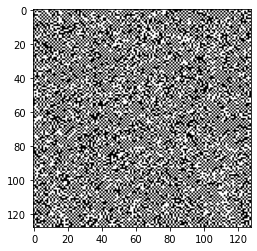

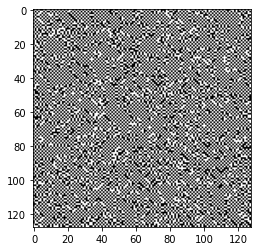

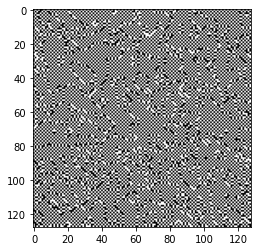

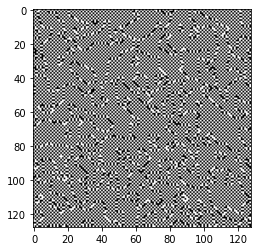

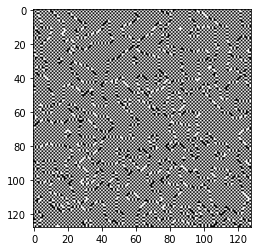

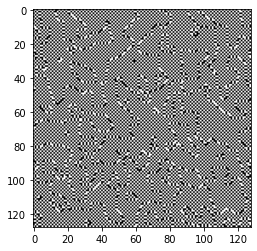

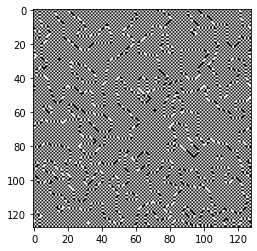

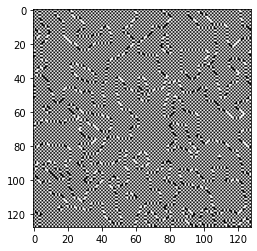

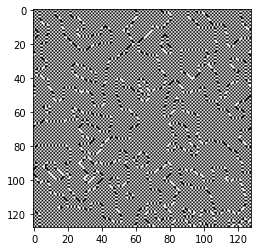

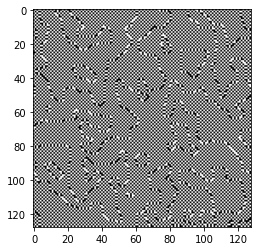

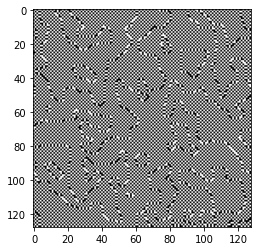

In [18]:
# random initialization of im_bin
plt.set_cmap('gray')
sh=[128,128]
im_bin=2-np.ceil(2*np.random.rand(*sh))
plt.imshow(im_bin)

beta_reg = 10

mafigure=plt.figure()
plt.imshow(im_bin)
mafigure.canvas.draw()
plt.show()

for n in range(10):
    echan(im_bin,beta_reg)
    plt.imshow(im_bin)
    mafigure.canvas.draw()
    plt.show(block=False)


plt.figure()
plt.imshow(im_bin)
plt.show()

#Q3
Run the program several times. Do you still get the same image? Comment on this.

By running the program multiple times we can see that we have a different image each time. This is normal as this technic uses probabilities to produce new images.

#Q4

Vary $\beta$ from 0.5 to 20. Comment on the results.

When we have a small $\beta$ (near 20) the changes are not so visible but when we have a high $\beta$ (near 0.5) there is a lot of remarkable transitions. 

#Q5
Which image minimizes the overall energy for this model?

As beta increases, we approach a more "ideal" and smoother grid, resulting in a higher overall energy.

#Q6
Change 𝛽 and give it a negative value. Describe the result and justify it.

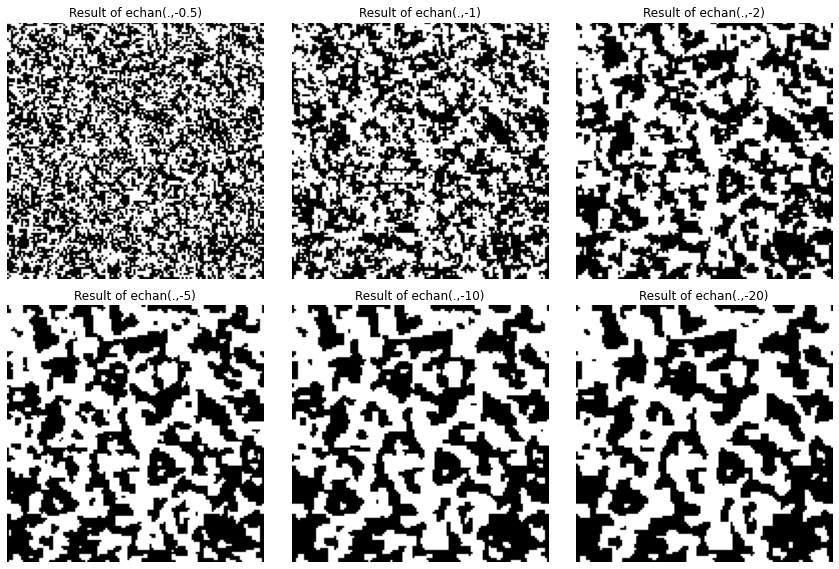

In [19]:
sh = [128,128]
im_bin = 2 - np.ceil(2 * np.random.rand(*sh))

list_of_beta = [-0.5, -1, -2, -5, -10, -20]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i in range(6) :

  beta_reg = list_of_beta[i]

  i0 = im_bin

  echan(im_bin,beta_reg)
  axes[i//3,i%3].imshow(im_bin)
  axes[i//3,i%3].axis('off')
  axes[i//3,i%3].set_title(f"Result of echan(.,{beta_reg})")
  im_bin = i0

plt.tight_layout()
plt.show()

In this scenario, we observe a contrary outcome. When dealing with exclusively negative values, a higher absolute beta leads to a greater deviation from an ideal grid, resulting in more prominent large spots. Consequently, there is a reduction in the frequency of white/black transitions. The energy decreases only as beta decreases.

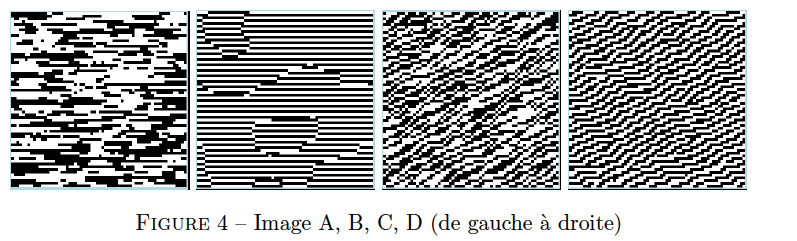

#Q7
We now work in 8-neighborhood, but still with cliques of order 2 (non-isotropic this time). For each of the following images, propose the clique potentials that allow us to obtain these realizations. Initially all clique potentials are zero.


* Image A : there is only one clique potential of order 2 which is -1.
* Image B : in addition to the previous one, there is a clique potential of order 2 which is 1. Indicate which one.
* Image C: in addition to the 2 previous ones, there is a clique potential of order 2 which is -1. Indicate which one.
* Image D: in addition to the 3 previous ones, there is a second order clique potential which is +1. Indicate which one.



- Image A: (-1), so we want to favor the more frequent configuration: the potential for the horizontal will be set to -1 for V(0,0) and V(1,1).

- Image B: (+1), so we want to disfavor the opposite configuration: the potential for the vertical will be set to 1 for V(0,0) and V(1,1).

- Image C: (-1), so we want to favor the more frequent configuration: the potential for the 45-degree diagonal will be set to -1 for V(0,0) and V(1,1).

- Image D: (+1), so we want to disfavor the opposite configuration: the potential for the 135-degree diagonal will be set to 1 for V(0,0) and V(1,1).

#Q8

Modify your program to define an Ising model with a diagonal attractive potential only (the other potentials are zero). It means that this model **encourages** similar labels (either 0 or 1) for neighboring pixels in the diagonal directions ($\pi/4$ or $3\pi/4$ directions). Comment on the result.

#A8

In [27]:
def echan2(im_bin,beta_reg):

    i=0
    j=0

    for i in range(im_bin.shape[0]):
        for j in range(im_bin.shape[1]):

            i1=(i-1)%im_bin.shape[0]
            i2=(i+1)%im_bin.shape[0]
            j1=(j-1)%im_bin.shape[1]
            j2=(j+1)%im_bin.shape[1]

            n = [(i1,j1),(i2,j1),(i1,j2),(i2,j2)] 
            v = [im_bin[nb[0]][nb[1]] for nb in n]

            Ureg0 = v.count(0.0) * beta_reg
            p0 = math.exp(-Ureg0)

            Ureg1 = v.count(1.0) * beta_reg
            p1 = math.exp(-Ureg1)

            if (p0+p1!=0.):
                if(random.uniform(0,1) < p0/(p0+p1)):
                    im_bin[i,j] = 0
                else :
                    im_bin[i,j] = 1

    return im_bin

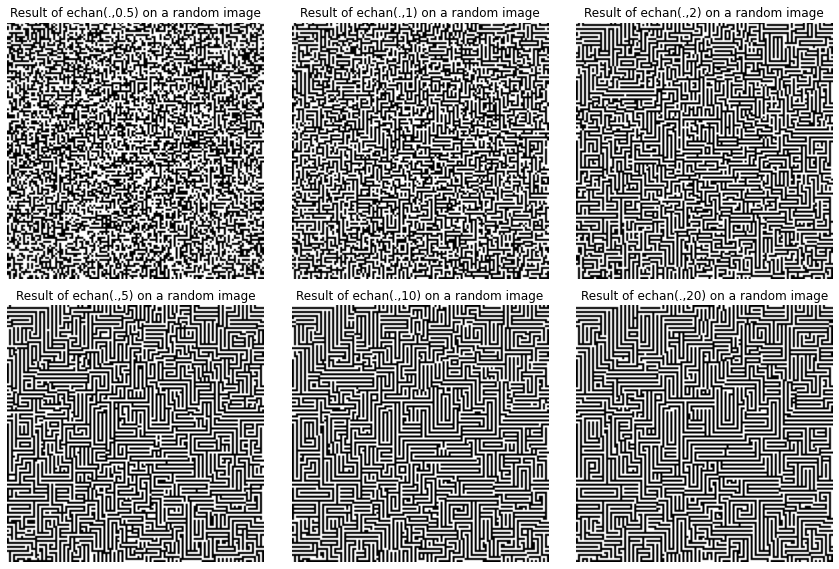

In [28]:
sh = [128,128]
im_bin = 2 - np.ceil(2 * np.random.rand(*sh))

list_of_beta = [0.5, 1, 2, 5, 10, 20]

fig, axes = plt.subplots(2, 3, figsize=(12, 8))

for i in range(6) :

  beta_reg = list_of_beta[i]

  i0 = im_bin

  echan2(im_bin,beta_reg)
  axes[i//3,i%3].imshow(im_bin)
  axes[i//3,i%3].axis('off')
  axes[i//3,i%3].set_title(f"Result of echan(.,{beta_reg}) on a random image")
  im_bin = i0

plt.tight_layout()
plt.show()